In [2]:
import pandas as pd
from DBS_utils import *

In [127]:
date_today = str(date.today())

### working hours
Monday 13 june 13:00-14:25
tuesday 14 jun 10:00-10:50

In [168]:
# \Divide by occracne frequency

In [169]:
matches_on_words_df = pd.read_csv('../data/matches_on_words_df{}.csv'.format(date_today), index_col=0)

In [170]:
matches_on_words_company_df = pd.read_csv('../data/matches_on_words_company_df{}.csv'.format(date_today), index_col=0)
matches_on_words_company_df.head(2)

,apple,paccar,starbucks,moderna,honeywell,twitter,Dexcom,lululemon,Marriott,skyworksinc,...,jd,illumina,cadence,MatchGroup,verisign,KLA,monster,fortinet,netEase,tmobile
Platform,21.0,5.0,4.0,10.0,1.0,21.0,7.0,NaN,5.0,20.0,...,19.0,20.0,5.0,11.0,NaN,9.0,NaN,2.0,18.0,4.0
loyalty,5.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,11.0,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9.0


In [171]:
matches_on_words_df.tail(2)

,index,count,category
376,application programming interfaces,1,Scale of Digital Business Strategy
377,acumen,1,DBS


In [172]:
for keyword in matches_on_words_df['index'].unique():

    relevant_row = matches_on_words_company_df[matches_on_words_company_df.index==keyword]
    keyword_hits = matches_on_words_df[matches_on_words_df['index']==keyword]['count'].sum()
    matches_on_words_company_df[matches_on_words_company_df.index==keyword] = relevant_row/keyword_hits**1

In [173]:
matches_on_words_company_df.head()

,apple,paccar,starbucks,moderna,honeywell,twitter,Dexcom,lululemon,Marriott,skyworksinc,...,jd,illumina,cadence,MatchGroup,verisign,KLA,monster,fortinet,netEase,tmobile
Platform,0.027815,0.006623,0.005298,0.013245,0.001325,0.027815,0.009272,NaN,0.006623,0.026490,...,0.025166,0.026490,0.006623,0.014570,NaN,0.011921,NaN,0.002649,0.023841,0.005298
loyalty,0.049020,NaN,0.196078,NaN,NaN,NaN,NaN,NaN,0.107843,NaN,...,0.019608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009804,0.088235
experience,0.029371,0.001399,0.029371,0.005594,0.012587,0.027972,NaN,0.016783,0.020979,0.030769,...,0.026573,0.005594,NaN,0.019580,0.009790,0.004196,0.012587,NaN,0.008392,0.027972
complexity,0.039427,NaN,NaN,0.010753,0.007168,NaN,NaN,0.032258,NaN,0.078853,...,0.003584,0.071685,NaN,NaN,0.003584,0.035842,NaN,NaN,NaN,NaN
continuous,0.016705,0.002278,0.015945,0.010630,0.006834,0.015945,0.003037,0.009871,0.015186,0.016705,...,0.014427,0.014427,0.015186,0.012908,0.007593,0.009871,0.012908,0.014427,0.012908,0.015186


In [174]:
# Combine for categories

In [175]:
matches_on_words_company_df = matches_on_words_company_df.reset_index().rename(columns={'index':'keyword'})

matches_on_words_company_df['category'] = matches_on_words_company_df.keyword.apply(lambda x: matches_on_words_df[matches_on_words_df['index']==x].reset_index().category[0])


In [176]:
matches_on_words_company_df.head()

,keyword,apple,paccar,starbucks,moderna,honeywell,twitter,Dexcom,lululemon,Marriott,...,illumina,cadence,MatchGroup,verisign,KLA,monster,fortinet,netEase,tmobile,category
0,Platform,0.027815,0.006623,0.005298,0.013245,0.001325,0.027815,0.009272,NaN,0.006623,...,0.026490,0.006623,0.014570,NaN,0.011921,NaN,0.002649,0.023841,0.005298,DBS
1,loyalty,0.049020,NaN,0.196078,NaN,NaN,NaN,NaN,NaN,0.107843,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009804,0.088235,DBS
2,experience,0.029371,0.001399,0.029371,0.005594,0.012587,0.027972,NaN,0.016783,0.020979,...,0.005594,NaN,0.019580,0.009790,0.004196,0.012587,NaN,0.008392,0.027972,DBS
3,complexity,0.039427,NaN,NaN,0.010753,0.007168,NaN,NaN,0.032258,NaN,...,0.071685,NaN,NaN,0.003584,0.035842,NaN,NaN,NaN,NaN,DBS
4,continuous,0.016705,0.002278,0.015945,0.010630,0.006834,0.015945,0.003037,0.009871,0.015186,...,0.014427,0.015186,0.012908,0.007593,0.009871,0.012908,0.014427,0.012908,0.015186,DBS


In [177]:
weighted_match_dict = {}
for cat in matches_on_words_df.category.unique():
    weighted_match_dict[cat] = matches_on_words_company_df[matches_on_words_company_df.category == cat].sum()[1:-1]

In [178]:
weighted_match_df = pd.DataFrame.from_dict(weighted_match_dict)

In [179]:
# visualize

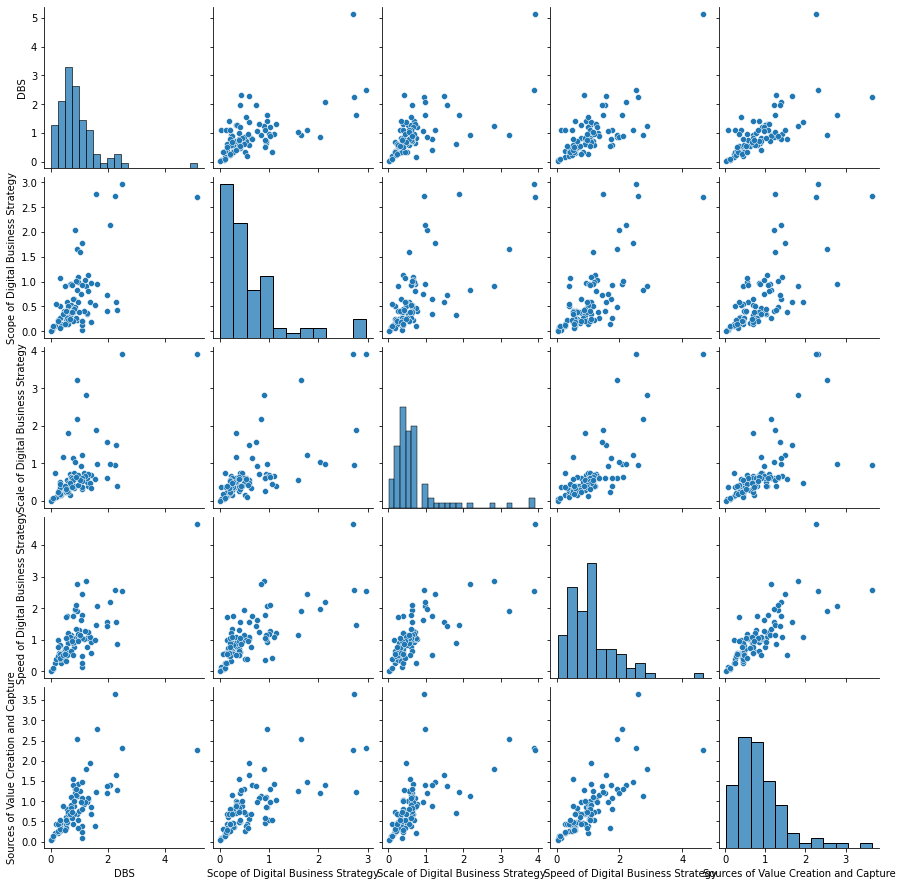

In [180]:
sns.pairplot(weighted_match_df)

# regression